In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

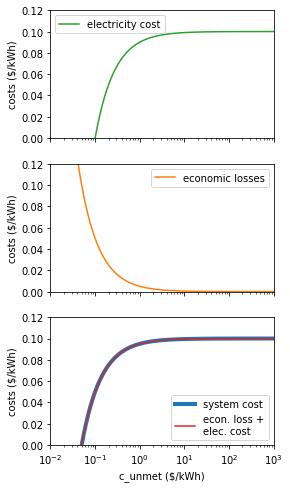

In [2]:
# First analytic example

# c_system from paper
def system_cost(c_fixed, D_max, c_unmet):
    return c_fixed * D_max * (1. - (c_fixed / (2. * c_unmet)))

# L from paper
def economic_losses(c_fixed, D_max, c_unmet):
    return (D_max / 2.) * (np.power(c_fixed, 2) / c_unmet)

# Fixed cost times G_opt from paper
def electricity_cost(c_fixed, D_max, c_unmet):
    return c_fixed * D_max * (1. - c_fixed / c_unmet)

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(4,8), sharex=True)

n = -2
x = [10**n,]
for i in range(100):
    n += 0.05
    x.append(10**n)
x = np.array(x)

c_fixed = .1
D_max = 1

axs[0].plot(x, electricity_cost(c_fixed, D_max, x), c='C2', label='electricity cost')
axs[1].plot(x, economic_losses(c_fixed, D_max, x), c='C1', label='economic losses')
axs[2].plot(x, system_cost(c_fixed, D_max, x), c='C0', lw=4, label='system cost')
# Stupid check one
axs[2].plot(x, economic_losses(c_fixed, D_max, x) + electricity_cost(c_fixed, D_max, x), 
            c='C3', label='econ. loss +\nelec. cost')

for ax in axs:
    ax.set_ylim(0, c_fixed*1.2)
    ax.set_ylabel('costs ($/kWh)')
    ax.legend()

axs[0].set_xlim(x[0], x[-1])
axs[2].set_xlabel('c_unmet ($/kWh)')
plt.xscale('log')

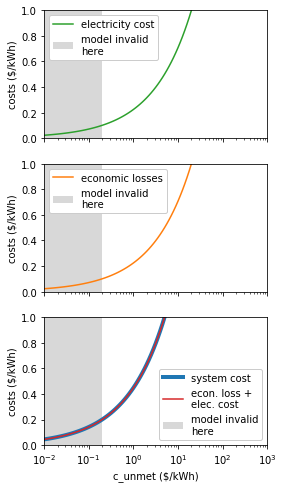

In [3]:
# Second analytic example

# c_system from paper
def system_cost(c_fixed, D_const, c_unmet):
    return D_const * np.sqrt(2. * c_fixed * c_unmet)

# L from paper
def economic_losses(c_fixed, D_const, c_unmet):
    return D_const * np.sqrt(c_fixed * c_unmet / 2.)

# Fixed cost times G_opt from paper
def electricity_cost(c_fixed, D_const, c_unmet):
    return c_fixed * D_const * np.sqrt(c_unmet / (2. * c_fixed))

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(4,8), sharex=True)

n = -2
x = [10**n,]
for i in range(100):
    n += 0.05
    x.append(10**n)
x = np.array(x)

c_fixed = .1
D_const = 1

axs[0].plot(x, electricity_cost(c_fixed, D_max, x), c='C2', label='electricity cost')
axs[1].plot(x, economic_losses(c_fixed, D_max, x), c='C1', label='economic losses')
axs[2].plot(x, system_cost(c_fixed, D_max, x), c='C0', lw=4, label='system cost')
# Stupid check one
axs[2].plot(x, economic_losses(c_fixed, D_max, x) + electricity_cost(c_fixed, D_max, x), 
            c='C3', label='econ. loss +\nelec. cost')

for ax in axs:
    ax.set_ylim(0, 1)#c_fixed*1.2)
    ax.set_ylabel('costs ($/kWh)')
    ax.fill_between(np.linspace(0, 2. * c_fixed, 100), np.zeros(100), 
                    np.ones(100) * 10, facecolor='gray', alpha=0.3, 
                    label='model invalid\nhere')
    ax.legend(framealpha=1)

axs[0].set_xlim(x[0], x[-1])
axs[2].set_xlabel('c_unmet ($/kWh)')
plt.xscale('log')